<a href="https://colab.research.google.com/github/kzeynep/Python_Atil_hoca/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("3-customersatisfaction.csv")

In [4]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


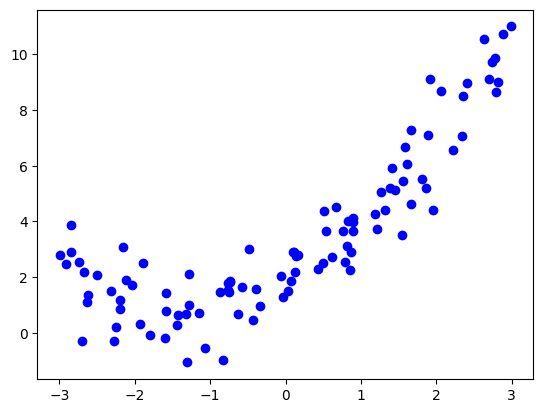

In [8]:
plt.scatter(df["Customer Satisfaction"],df["Incentive"],color ="b")

In [9]:
# dependent and independent feature

In [10]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [11]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [12]:
y.tail()

,Incentive
95,8.686851
96,2.901486
97,0.786207
98,5.447475
99,4.356168


In [13]:
# train - test spilt

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train

,Customer Satisfaction
55,-1.145369
88,1.863312
26,0.893379
42,-2.042095
69,-1.070874
...,...
60,1.411586
71,2.696355
14,0.072354
92,-0.483321


In [16]:
# scaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
# prediction

In [23]:
y_pred = regression.predict(X_test)

In [24]:
y_pred

array([ 6.962112  ,  7.28964726,  4.3999892 ,  0.88535507,  6.44045877,
       -0.4932875 ,  5.49488232,  2.44426859,  7.0400049 ,  1.73295732,
        4.51331764,  7.0205549 ,  2.40798799,  2.89807558,  0.54073554,
        1.545679  ,  3.61947969,  2.57779842,  4.0406194 , -0.01566338])

In [25]:
score = r2_score(y_test,y_pred)

In [26]:
score

0.7373721952395638

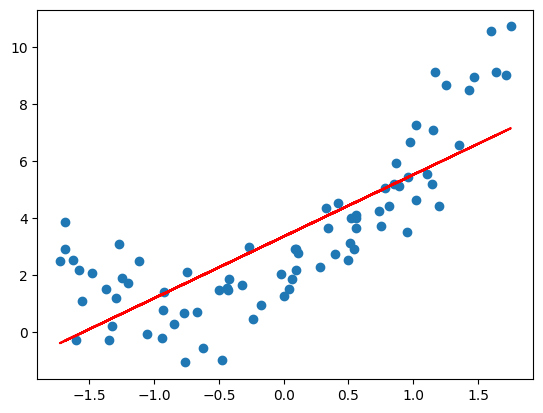

In [27]:
plt.plot(X_train,regression.predict(X_train),color="r")
plt.scatter(X_train,y_train)
plt.show()

In [29]:
poly = PolynomialFeatures(degree = 2 , include_bias=True) # degree ==> denklemin derecesini görme

In [30]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [31]:
X_train_poly

array([[ 1.00000000e+00, -6.64404752e-01,  4.41433674e-01],
       [ 1.00000000e+00,  1.14156007e+00,  1.30315938e+00],
       [ 1.00000000e+00,  5.59356250e-01,  3.12879414e-01],
       [ 1.00000000e+00, -1.20266557e+00,  1.44640448e+00],
       [ 1.00000000e+00, -6.19689337e-01,  3.84014875e-01],
       [ 1.00000000e+00, -9.39000619e-01,  8.81722162e-01],
       [ 1.00000000e+00,  8.16491235e-01,  6.66657937e-01],
       [ 1.00000000e+00,  5.41811047e-01,  2.93559211e-01],
       [ 1.00000000e+00, -1.55655545e+00,  2.42286487e+00],
       [ 1.00000000e+00, -1.32379297e+00,  1.75242784e+00],
       [ 1.00000000e+00,  8.93298400e-01,  7.97982031e-01],
       [ 1.00000000e+00,  5.19159804e-01,  2.69526902e-01],
       [ 1.00000000e+00, -1.27309326e+00,  1.62076644e+00],
       [ 1.00000000e+00,  7.38015668e-01,  5.44667126e-01],
       [ 1.00000000e+00,  5.09624355e-01,  2.59716983e-01],
       [ 1.00000000e+00, -7.64084303e-01,  5.83824822e-01],
       [ 1.00000000e+00, -1.47875352e+00

In [32]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)

LinearRegression()

In [33]:
y_pred = regression.predict(X_test_poly)
scıre = r2_score(y_test,y_pred)
print(score)

0.7373721952395638


In [34]:
regression.coef_

array([0.        , 2.35314971, 1.47232173])

In [35]:
regression.intercept_

np.float64(1.879745695746026)

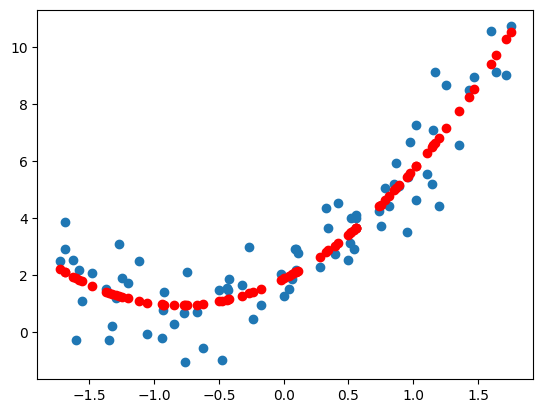

In [38]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="r")
plt.show()

In [39]:
poly = PolynomialFeatures(degree = 3 , include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [40]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9661389074093036


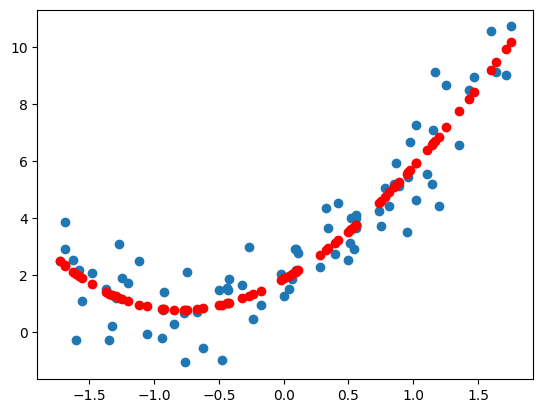

In [41]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="r")
plt.show()

In [42]:
# new data

In [44]:
new_df = pd.read_csv("3-newdatas.csv")

In [45]:
new_df.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [46]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [47]:
new_df.rename(columns={"0":"Customer_Satisfaction"},inplace=True)

In [48]:
new_df

,Customer_Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [49]:
X_new = new_df[["Customer_Satisfaction"]]

In [50]:
X_new

,Customer_Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [52]:
X_new=scaler.fit_transform(X_new)

In [53]:
X_new_poly = poly.fit_transform(X_new)

In [54]:
y_new = regression.predict(X_new_poly)

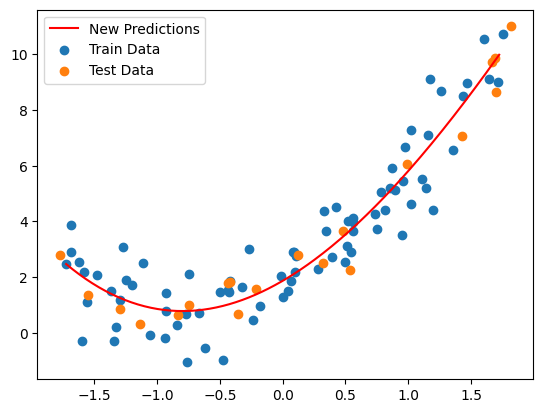

In [57]:
plt.plot(X_new,y_new,color="r",label ="New Predictions")
plt.scatter(X_train,y_train,label="Train Data")
plt.scatter(X_test,y_test,label="Test Data")
plt.legend()
plt.show()

In [58]:
# pipline

In [72]:
def poly_regression(degree):
  poly_features = PolynomialFeatures(degree=degree)
  lin_reg = LinearRegression()
  scaler = StandardScaler()
  pipeline = Pipeline([
      ("standard_scaler ",scaler),
      ("poly",poly_features),
      ("lin_reg",lin_reg)
  ])
  pipeline.fit(X_train,y_train)
  score = pipeline.score(X_test,y_test)
  print("R2 score:",score)
  y_pred_new = pipeline.predict(X_new)
  plt.plot(X_new,y_pred_new,color="r",label ="New Predictions")
  plt.scatter(X_train,y_train,label="Train Data")
  plt.scatter(X_test,y_test,label="Test Data")
  plt.legend()
  plt.show()

R2 score: 0.9632439741601065


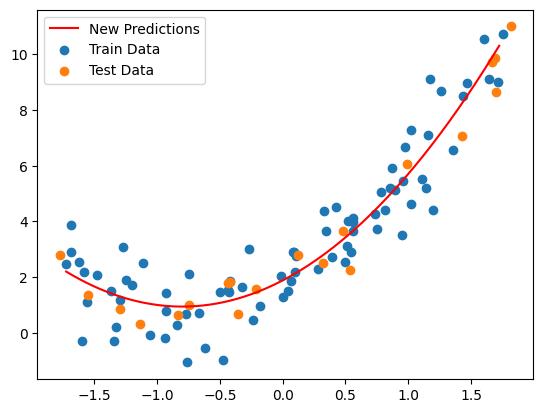

In [73]:
poly_regression(2)

R2 score: 0.9661389074093036


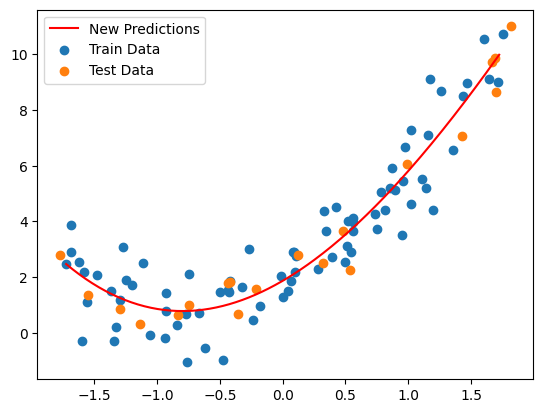

In [74]:
poly_regression(3)

R2 score: 0.7373721952395638


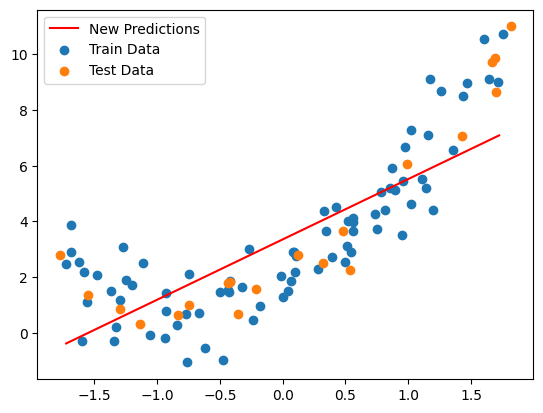

R2 score: 0.9632439741601065


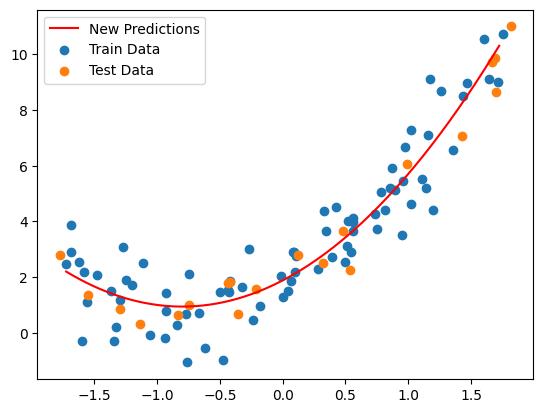

R2 score: 0.9661389074093036


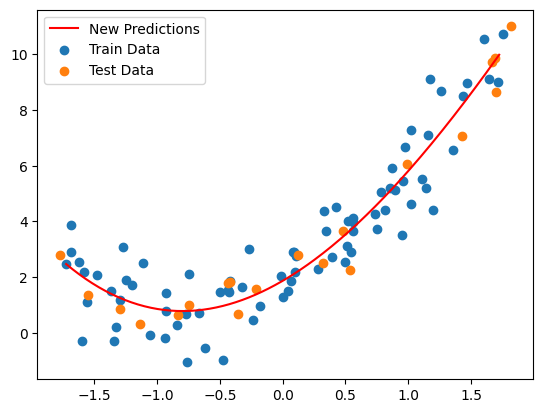

R2 score: 0.9664547996507151


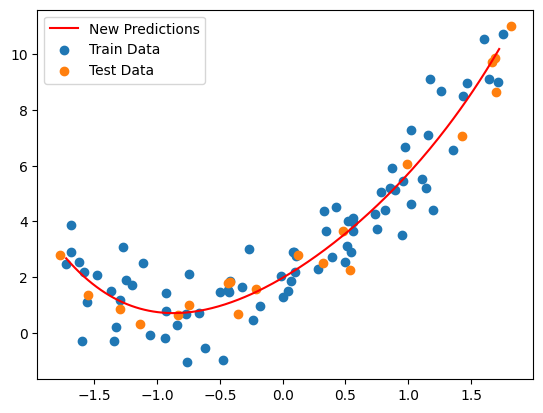

R2 score: 0.9667388119575419


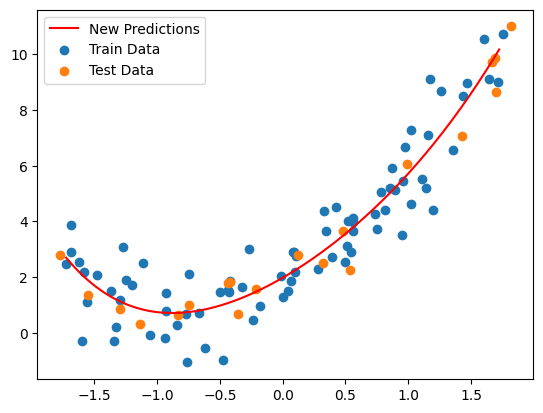

R2 score: 0.9649327607552902


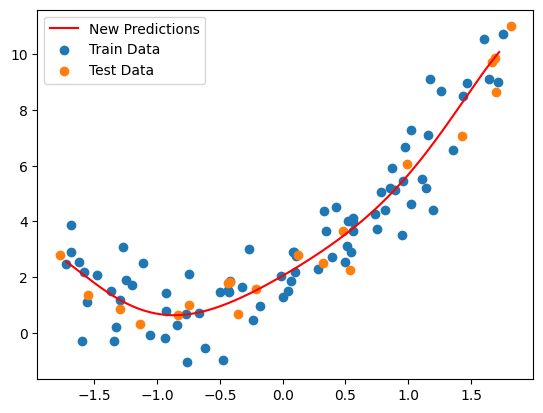

R2 score: 0.9489423653523921


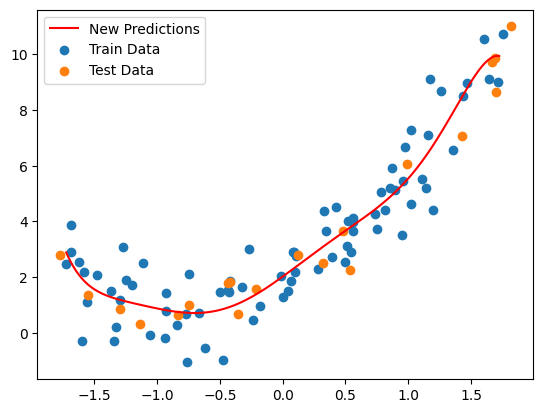

R2 score: 0.9499384920196265


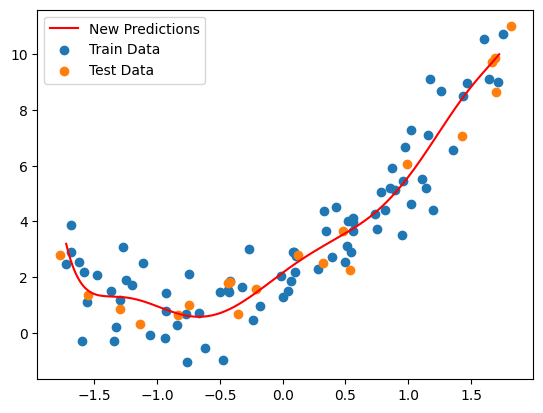

R2 score: 0.9358334664056605


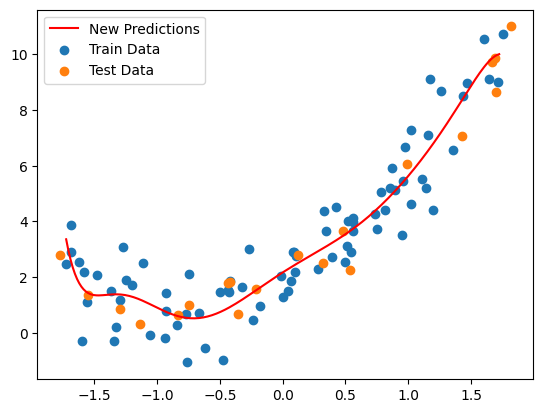

In [75]:
for degree in range(1,10):
  poly_regression(degree)